<a href="https://colab.research.google.com/github/quantumhome/DataAnalysisCaseStudy/blob/master/Problem_Statement_House_data_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement 4. write a python program to draw the 3d plot for the model developed for house price prediction using suitable python based 3d plotting libraries**

In [41]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [42]:
# Sample dataset
df = pd.read_csv('/content/sample_data/home_data.csv')
df




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [43]:
# Prepare features and target
X = df[['sqft_lot', 'bedrooms']]
y = df['price']



In [44]:
# Train linear regression model
model = LinearRegression()
model.fit(X, y)



LinearRegression()

In [45]:
# Create meshgrid for 3D surface
size_range = np.linspace(df['sqft_lot'].min(), df['sqft_lot'].max(), 10)
bedroom_range = np.linspace(df['bedrooms'].min(), df['bedrooms'].max(), 10)
size_grid, bedroom_grid = np.meshgrid(size_range, bedroom_range)
price_pred = model.predict(np.c_[size_grid.ravel(), bedroom_grid.ravel()]).reshape(size_grid.shape)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


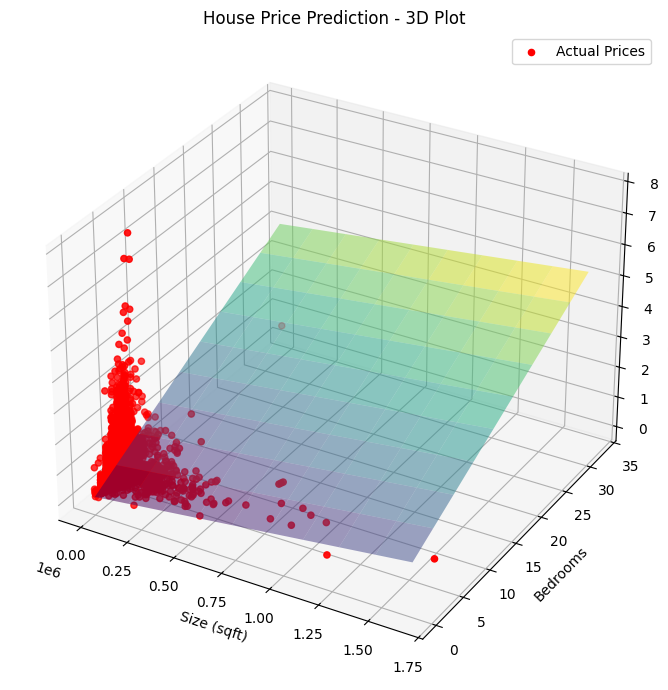

In [46]:
# plotting data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(size_grid, bedroom_grid, price_pred, alpha=0.5, cmap='viridis')
ax.scatter(df['sqft_lot'], df['bedrooms'], df['price'], color='red', label='Actual Prices')
ax.set_xlabel('Size (sqft)')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price ($1000s)')
ax.set_title('House Price Prediction - 3D Plot')
plt.legend()
plt.tight_layout()
plt.show()